In [4]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download anoopjohny/traffic-crashes-crashes

 80% 94.0M/118M [00:00<00:00, 129MB/s]
100% 118M/118M [00:00<00:00, 131MB/s] 


In [11]:
! unzip traffic-crashes-crashes

Archive:  traffic-crashes-crashes.zip
  inflating: Traffic_Crashes_-_Crashes.csv  


In [1]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a7296b3bea395d11f3cb1db8f830567c5312cf3b38e0de0b6e327b78c3ed424e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
import pandas as pd
import plotly.express as px
#This enables the plotted graphs to display,they were not displaying initially after plotting
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import io

In [14]:
traffic_crashes_df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [15]:
traffic_crashes_df.shape

(794956, 48)

In [13]:
print(traffic_crashes_df.describe())

       POSTED_SPEED_LIMIT      LANE_CNT      STREET_NO  BEAT_OF_OCCURRENCE  \
count       794956.000000  1.990060e+05  794956.000000       794951.000000   
mean            28.402547  1.333032e+01    3688.085435         1242.916397   
std              6.179272  2.961623e+03    2887.990566          705.268208   
min              0.000000  0.000000e+00       0.000000          111.000000   
25%             30.000000  2.000000e+00    1248.000000          714.000000   
50%             30.000000  2.000000e+00    3201.000000         1211.000000   
75%             30.000000  4.000000e+00    5600.000000         1822.000000   
max             99.000000  1.191625e+06  451100.000000         6100.000000   

           NUM_UNITS  INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count  794956.000000   793215.000000   793215.000000            793215.000000   
mean        2.034919        0.189448        0.001195                 0.020032   
std         0.452475        0.565654        0.037456  

In [16]:
traffic_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                794956 non-null  object 
 1   CRASH_DATE_EST_I               59606 non-null   object 
 2   CRASH_DATE                     794956 non-null  object 
 3   POSTED_SPEED_LIMIT             794956 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         794956 non-null  object 
 5   DEVICE_CONDITION               794956 non-null  object 
 6   WEATHER_CONDITION              794956 non-null  object 
 7   LIGHTING_CONDITION             794956 non-null  object 
 8   FIRST_CRASH_TYPE               794956 non-null  object 
 9   TRAFFICWAY_TYPE                794956 non-null  object 
 10  LANE_CNT                       199006 non-null  float64
 11  ALIGNMENT                      794956 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [17]:
# checking for duplicates
print(traffic_crashes_df.duplicated().values.any())

False


In [18]:
# checking for null values
print(traffic_crashes_df.isna().values.any())

True


In [19]:
traffic_crashes_df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 735350
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         595950
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       23258
CRASH_TYPE                            0
INTERSECTION_RELATED_I           612741
NOT_RIGHT_OF_WAY_I               758229
HIT_AND_RUN_I                    546330
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [21]:
#Reformatting the column names
traffic_crashes_df.columns = [
    col.lower() for col in traffic_crashes_df.columns
]
traffic_crashes_df.columns = [
    'crash_record_id','crash_date_est_i','crash_date','posted_speed_limit',
    'traffic_control_device','device_condition','weather_condition',
    'lighting_condition','first_crash_type','trafficway_type','lane_cnt',
    'alignment','roadway_surface_cond','road_defect','report_type',
    'crash_type','intersection_related_i','not_right_of_way_i',
    'hit_and_run_i','damage','date_police_notified','prim_contributory_cause',
    'sec_contributory_cause','street_no','street_direction','street_name',
    'beat_of_occurrence','photos_taken_i','statements_taken_i','dooring_i',
    'work_zone_i','work_zone_type','workers_present_i','num_units',
    'most_severe_injury','injuries_total','injuries_fatal','injuries_incapacitating',
    'injuries_non_incapacitating','injuries_reported_not_evident',
    'injuries_no_indication','injuries_unknown','crash_hour',
    'crash_day_of_week','crash_month','latitude','longitude','location'
]

In [22]:
#Filtering the NaN values per column
col_subset = [
    'crash_record_id','crash_date_est_i','lane_cnt','intersection_related_i',
    'not_right_of_way_i','hit_and_run_i','photos_taken_i',
    'statements_taken_i','dooring_i','work_zone_i','work_zone_type',
    'workers_present_i'
]
traffic_crashes_df.loc[traffic_crashes_df.crash_date_est_i.isna()][col_subset]

,crash_record_id,crash_date_est_i,lane_cnt,intersection_related_i,not_right_of_way_i,hit_and_run_i,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
794951,b4944ab32a9f692cf95c2645b6683f032e74932532947d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794952,d4bca3b24c17b9af828558fc95699da3c57fe7ea07daf5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794953,ef84ea51375f9e29d55d99fb2b1dfaf8ea9d1fbc0f667e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794954,9ba7b0e570841fc865b62892fb4931684ce4abe8162ee1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Dropping the NaN colums
#Dropping the longitude, latitude and location columns since it won't be used
crashes_df = traffic_crashes_df.drop([
    'crash_date_est_i','lane_cnt','intersection_related_i',
    'not_right_of_way_i','photos_taken_i',
    'statements_taken_i','dooring_i','work_zone_i','work_zone_type',
    'workers_present_i', 'latitude','longitude','location'
], axis=1)

crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_record_id                794956 non-null  object 
 1   crash_date                     794956 non-null  object 
 2   posted_speed_limit             794956 non-null  int64  
 3   traffic_control_device         794956 non-null  object 
 4   device_condition               794956 non-null  object 
 5   weather_condition              794956 non-null  object 
 6   lighting_condition             794956 non-null  object 
 7   first_crash_type               794956 non-null  object 
 8   trafficway_type                794956 non-null  object 
 9   alignment                      794956 non-null  object 
 10  roadway_surface_cond           794956 non-null  object 
 11  road_defect                    794956 non-null  object 
 12  report_type                   

In [30]:
crashes_df.loc[crashes_df['injuries_total'].idxmax()]

crash_record_id                  04225d53f733b9cb6c42a3ff1c05b88c5b0e03a17ec274...
crash_date                                                  05/07/2019 05:03:00 AM
posted_speed_limit                                                              30
traffic_control_device                                              TRAFFIC SIGNAL
device_condition                                              FUNCTIONING PROPERLY
weather_condition                                                             RAIN
lighting_condition                                                            DUSK
first_crash_type                                                          REAR END
trafficway_type                                                        NOT DIVIDED
alignment                                                       STRAIGHT AND LEVEL
roadway_surface_cond                                                           WET
road_defect                                                                UNKNOWN
repo

In [31]:
display(crashes_df['traffic_control_device'].value_counts())

NO CONTROLS                 452378
TRAFFIC SIGNAL              220279
STOP SIGN/FLASHER            78807
UNKNOWN                      31585
OTHER                         5396
LANE USE MARKING              1226
YIELD                         1170
OTHER REG. SIGN                870
OTHER WARNING SIGN             654
RAILROAD CROSSING GATE         517
PEDESTRIAN CROSSING SIGN       491
FLASHING CONTROL SIGNAL        313
DELINEATORS                    311
SCHOOL ZONE                    298
POLICE/FLAGMAN                 268
OTHER RAILROAD CROSSING        176
RR CROSSING SIGN               145
NO PASSING                      48
BICYCLE CROSSING SIGN           24
Name: traffic_control_device, dtype: int64

In [32]:
display(crashes_df['hit_and_run_i'].value_counts())

Y    237948
N     10678
Name: hit_and_run_i, dtype: int64

In [33]:
display(crashes_df['damage'].value_counts())

OVER $1,500      491510
$501 - $1,500    212188
$500 OR LESS      91258
Name: damage, dtype: int64

In [34]:
display(crashes_df['weather_condition'].value_counts())

CLEAR                       624964
RAIN                         69694
UNKNOWN                      43295
SNOW                         26895
CLOUDY/OVERCAST              23458
OTHER                         2467
FREEZING RAIN/DRIZZLE         1453
FOG/SMOKE/HAZE                1222
SLEET/HAIL                     948
BLOWING SNOW                   404
SEVERE CROSS WIND GATE         149
BLOWING SAND, SOIL, DIRT         7
Name: weather_condition, dtype: int64

In [35]:
display(crashes_df['road_defect'].value_counts())

NO DEFECTS           641101
UNKNOWN              138228
RUT, HOLES             5968
OTHER                  4354
WORN SURFACE           3245
SHOULDER DEFECT        1453
DEBRIS ON ROADWAY       607
Name: road_defect, dtype: int64

In [36]:
display(crashes_df['prim_contributory_cause'].value_counts())

UNABLE TO DETERMINE                                                                 308842
FAILING TO YIELD RIGHT-OF-WAY                                                        87251
FOLLOWING TOO CLOSELY                                                                77622
NOT APPLICABLE                                                                       42111
IMPROPER OVERTAKING/PASSING                                                          39122
FAILING TO REDUCE SPEED TO AVOID CRASH                                               33626
IMPROPER BACKING                                                                     31430
IMPROPER LANE USAGE                                                                  28577
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  26505
IMPROPER TURNING/NO SIGNAL                                                           26401
DISREGARDING TRAFFIC SIGNALS                                                         15462

In [37]:
display(crashes_df['sec_contributory_cause'].value_counts())

NOT APPLICABLE                                                                      326198
UNABLE TO DETERMINE                                                                 287689
FAILING TO REDUCE SPEED TO AVOID CRASH                                               29823
FAILING TO YIELD RIGHT-OF-WAY                                                        24863
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  24379
FOLLOWING TOO CLOSELY                                                                20975
IMPROPER OVERTAKING/PASSING                                                          12144
IMPROPER LANE USAGE                                                                  11172
WEATHER                                                                               9068
IMPROPER TURNING/NO SIGNAL                                                            8100
IMPROPER BACKING                                                                      6392

In [39]:
cases_by_street_name = crashes_df.groupby('street_name')[[
    'injuries_reported_not_evident',
    'injuries_total',
    'injuries_non_incapacitating',
    'injuries_fatal',
    'injuries_incapacitating',
    'injuries_no_indication'
]].sum()

cases_by_street_name = cases_by_street_name.sort_values(
    by = 'injuries_total',
    ascending = False
)[:5]
cases_by_street_name

,injuries_reported_not_evident,injuries_total,injuries_non_incapacitating,injuries_fatal,injuries_incapacitating,injuries_no_indication
street_name,,,,,,
PULASKI RD,1439.0,4312.0,2361.0,28.0,484.0,42738.0
WESTERN AVE,1459.0,4275.0,2377.0,26.0,413.0,46273.0
ASHLAND AVE,1278.0,3779.0,2071.0,25.0,405.0,36424.0
CICERO AVE,1282.0,3746.0,2027.0,30.0,407.0,40312.0
HALSTED ST,1270.0,3719.0,2026.0,29.0,394.0,32959.0


In [40]:
cases_by_month = crashes_df.groupby('crash_month')[[
    'injuries_fatal',
    'injuries_total',
    'injuries_reported_not_evident',
    'injuries_non_incapacitating',
    'injuries_incapacitating'
]].sum()

cases_by_month.head(12)

,injuries_fatal,injuries_total,injuries_reported_not_evident,injuries_non_incapacitating,injuries_incapacitating
crash_month,,,,,
1,69.0,9919.0,3337.0,5506.0,1007.0
2,57.0,8851.0,3053.0,4810.0,931.0
3,65.0,10220.0,3446.0,5636.0,1073.0
4,55.0,10556.0,3491.0,5933.0,1077.0
5,75.0,12895.0,3983.0,7443.0,1394.0
6,82.0,13663.0,4174.0,7904.0,1503.0
7,102.0,14479.0,4413.0,8353.0,1611.0
8,94.0,14301.0,4329.0,8357.0,1521.0
9,97.0,14578.0,4616.0,8283.0,1582.0


In [41]:
cases_by_month['months'] = 'January','February','March','April','May','June','July','August','September','October','November','December'

In [42]:
cases_by_month.head(12)

,injuries_fatal,injuries_total,injuries_reported_not_evident,injuries_non_incapacitating,injuries_incapacitating,months
crash_month,,,,,,
1,69.0,9919.0,3337.0,5506.0,1007.0,January
2,57.0,8851.0,3053.0,4810.0,931.0,February
3,65.0,10220.0,3446.0,5636.0,1073.0,March
4,55.0,10556.0,3491.0,5933.0,1077.0,April
5,75.0,12895.0,3983.0,7443.0,1394.0,May
6,82.0,13663.0,4174.0,7904.0,1503.0,June
7,102.0,14479.0,4413.0,8353.0,1611.0,July
8,94.0,14301.0,4329.0,8357.0,1521.0,August
9,97.0,14578.0,4616.0,8283.0,1582.0,September


In [43]:
by_month = cases_by_month.set_index('months')

by_month = by_month.sort_values(
    by = "injuries_total",
    ascending = False
)[:12]

by_month

,injuries_fatal,injuries_total,injuries_reported_not_evident,injuries_non_incapacitating,injuries_incapacitating
months,,,,,
October,87.0,15211.0,4998.0,8544.0,1582.0
September,97.0,14578.0,4616.0,8283.0,1582.0
July,102.0,14479.0,4413.0,8353.0,1611.0
August,94.0,14301.0,4329.0,8357.0,1521.0
June,82.0,13663.0,4174.0,7904.0,1503.0
November,77.0,12949.0,4363.0,7208.0,1301.0
May,75.0,12895.0,3983.0,7443.0,1394.0
December,88.0,12651.0,4338.0,6917.0,1308.0
April,55.0,10556.0,3491.0,5933.0,1077.0


In [44]:
by_month.idxmax()

injuries_fatal                      July
injuries_total                   October
injuries_reported_not_evident    October
injuries_non_incapacitating      October
injuries_incapacitating             July
dtype: object

In [45]:
by_month.idxmin()


injuries_fatal                      April
injuries_total                   February
injuries_reported_not_evident    February
injuries_non_incapacitating      February
injuries_incapacitating          February
dtype: object

In [46]:
chart_by_street = crashes_df.street_name.value_counts()[:5]
chart_by_street

WESTERN AVE    21668
PULASKI RD     19153
CICERO AVE     17834
ASHLAND AVE    17261
HALSTED ST     15445
Name: street_name, dtype: int64

In [61]:
crashes_df.dtypes

crash_record_id                   object
crash_date                        object
posted_speed_limit                 int64
traffic_control_device            object
device_condition                  object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
report_type                       object
crash_type                        object
hit_and_run_i                     object
damage                            object
date_police_notified              object
prim_contributory_cause           object
sec_contributory_cause            object
street_no                          int64
street_direction                  object
street_name                       object
beat_of_occurrence               float64
num_units                          int64
most_severe_inju

In [56]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

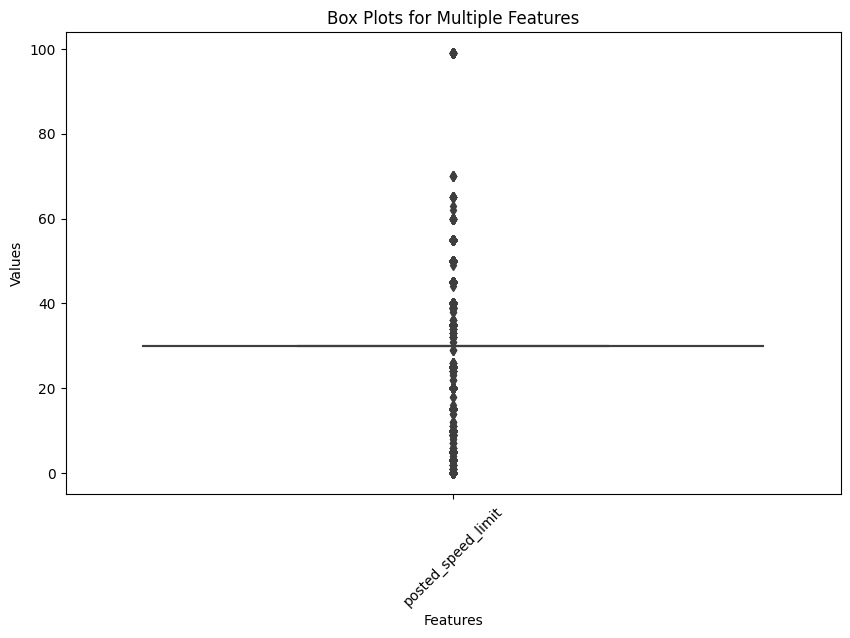

In [58]:
plt.figure(figsize=(10,6))  # Adjust the figure size if needed
sns.boxplot(data=crashes_df[['posted_speed_limit']], orient='v')  # Replace with your feature names
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots for Multiple Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

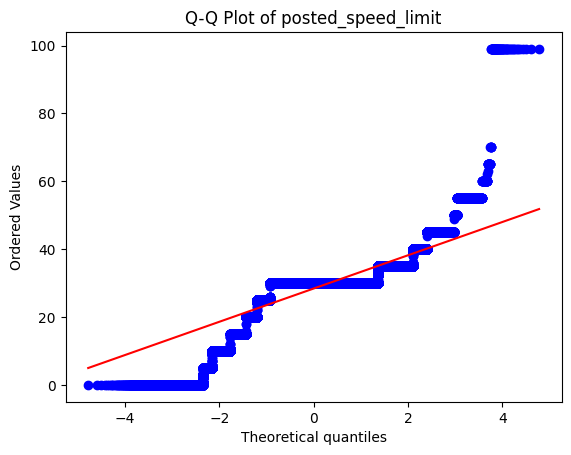

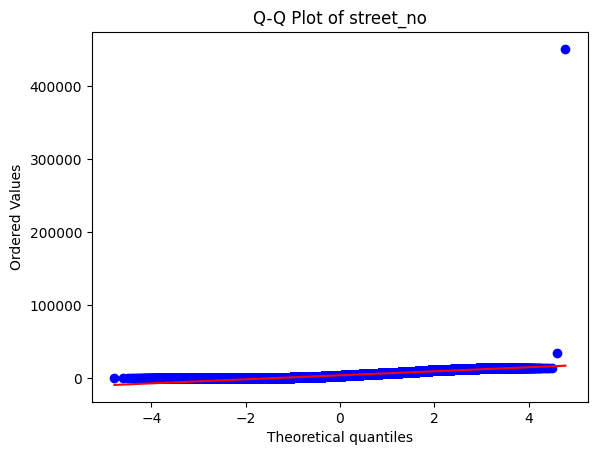

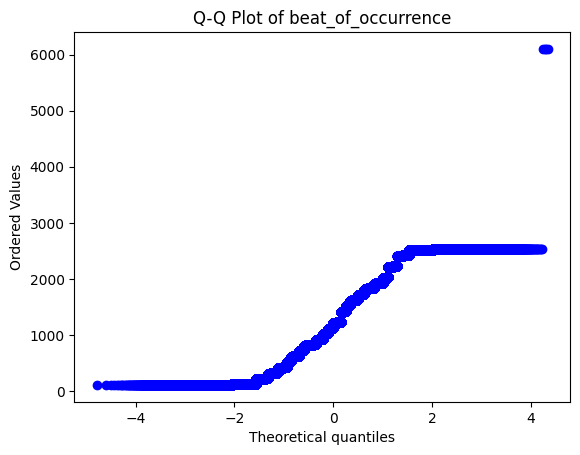

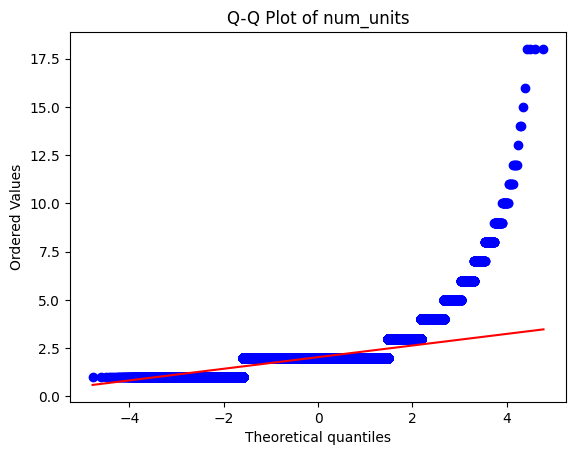

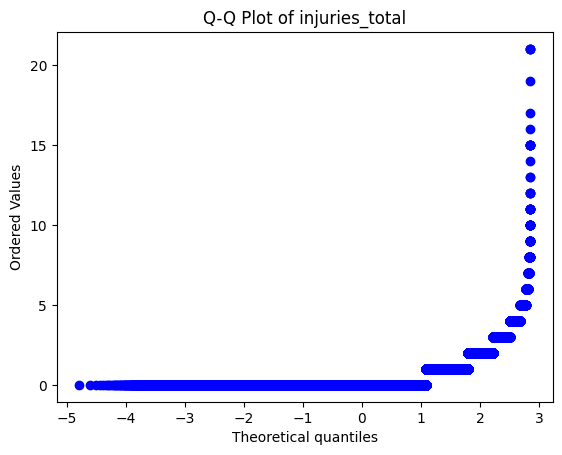

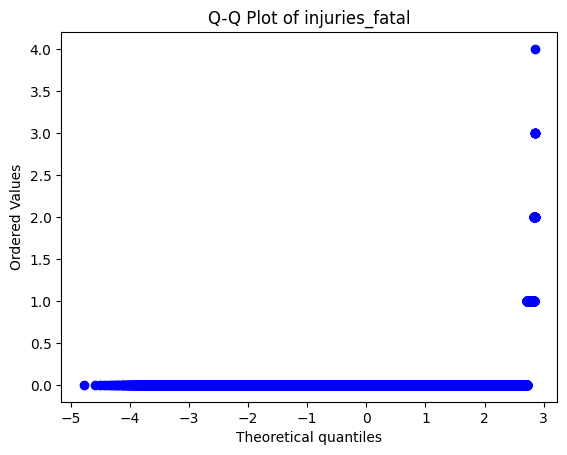

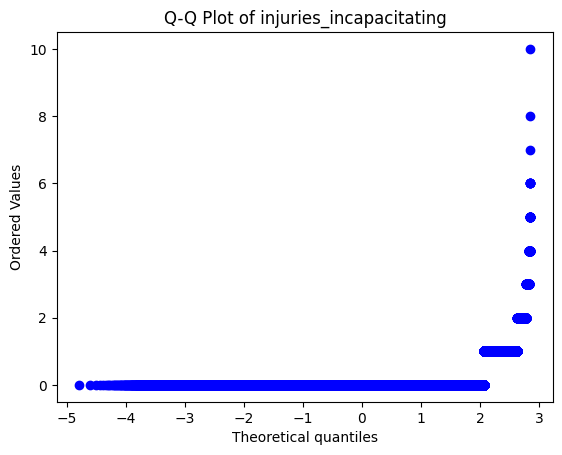

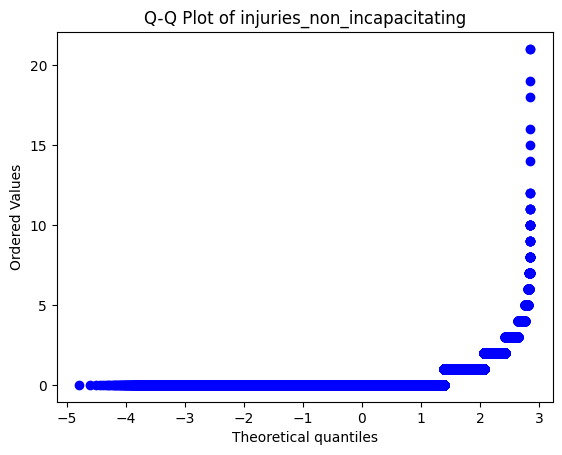

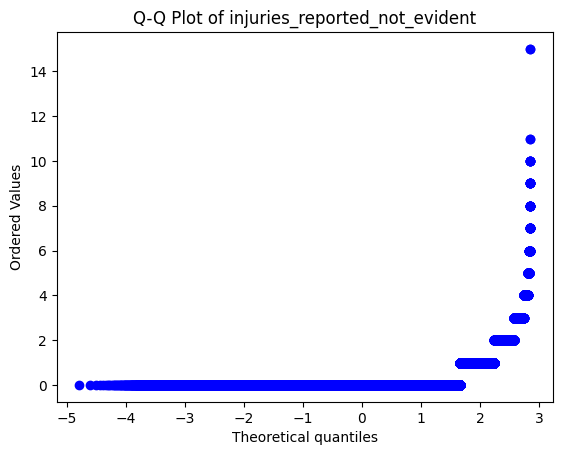

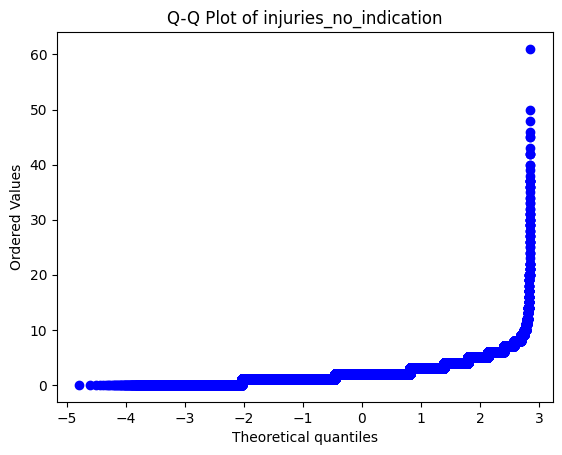

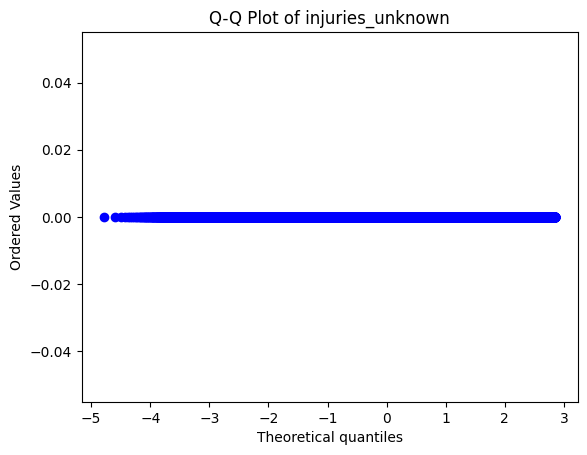

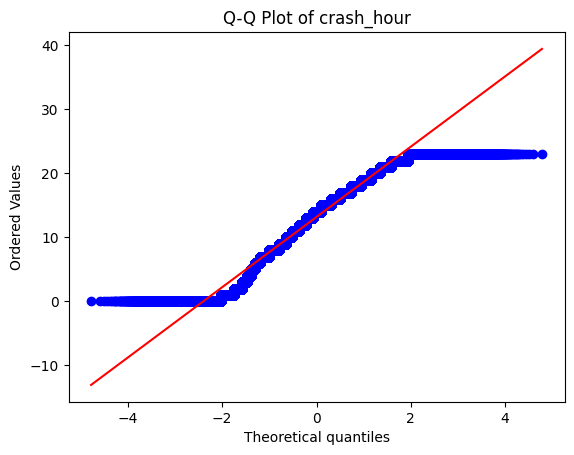

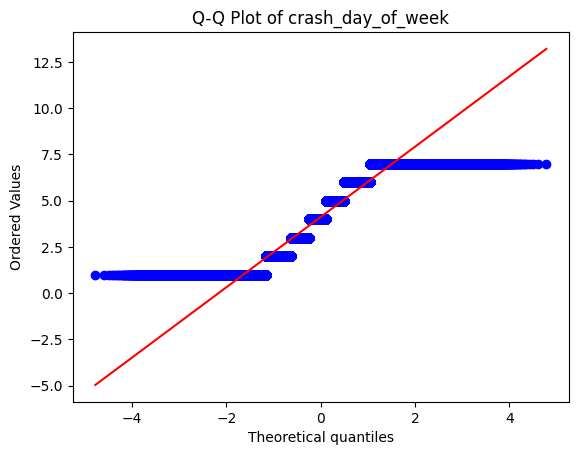

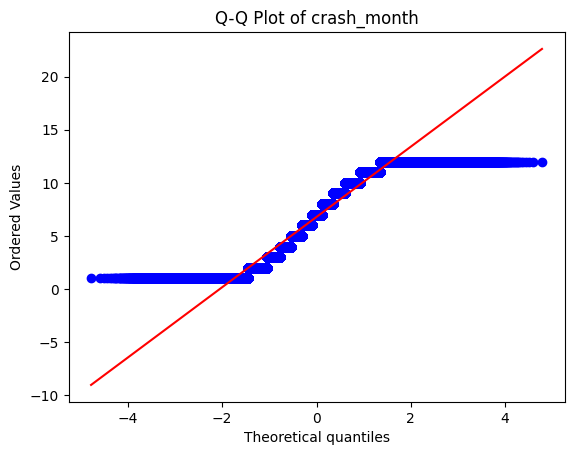

In [64]:
from scipy import stats
import matplotlib.pyplot as plt

# Generate a Q-Q plot
for i in crashes_df.columns:
    if(crashes_df[i].dtype=="object"):
        continue

    plt.figure()
    stats.probplot(crashes_df[i], dist="norm", plot=plt)
    plt.title('Q-Q Plot of '+i)
    plt.show()

<Figure size 640x480 with 0 Axes>

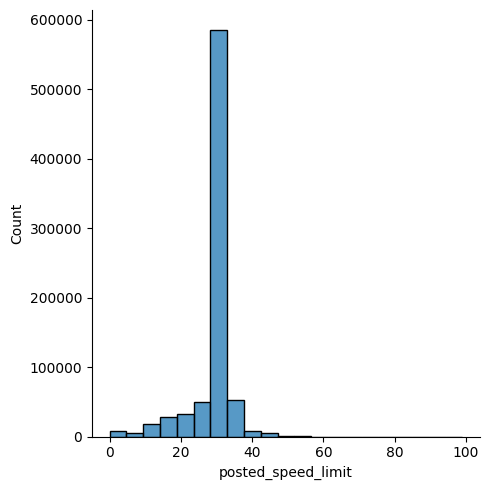

<Figure size 640x480 with 0 Axes>

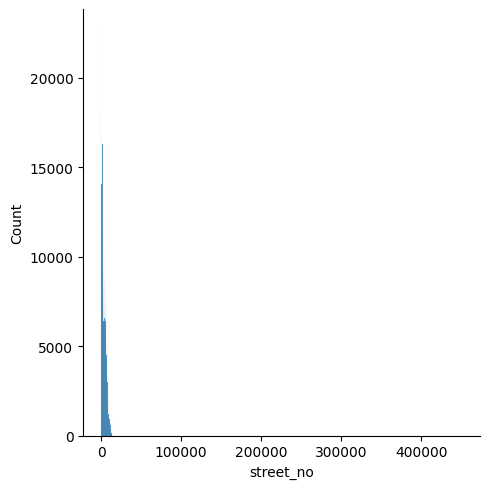

<Figure size 640x480 with 0 Axes>

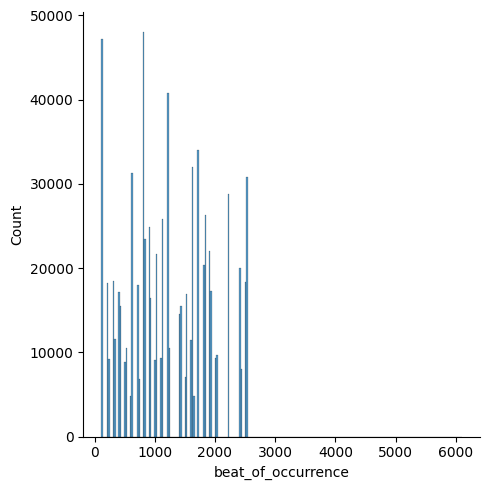

<Figure size 640x480 with 0 Axes>

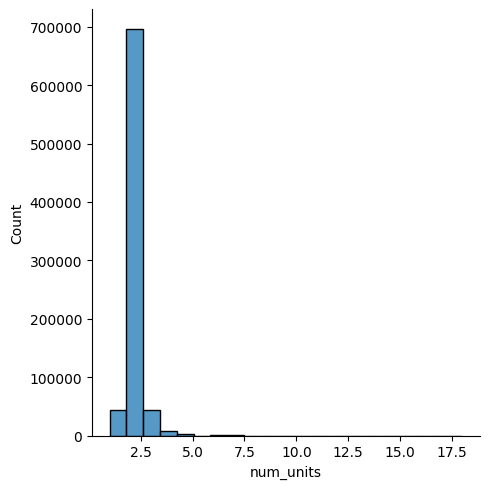

<Figure size 640x480 with 0 Axes>

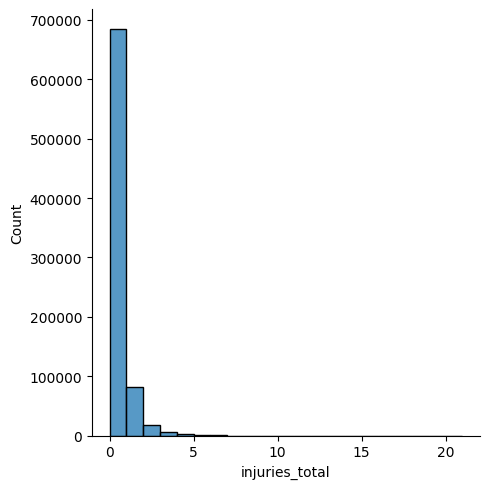

<Figure size 640x480 with 0 Axes>

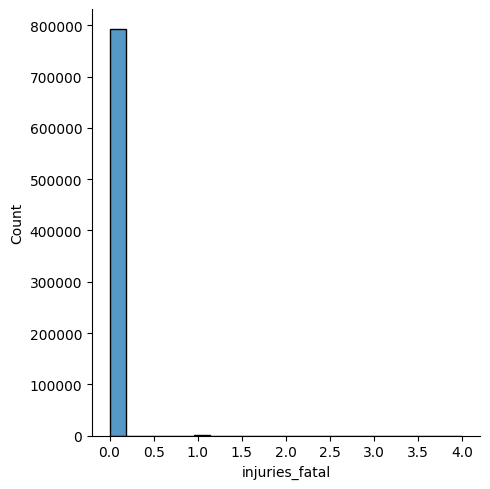

<Figure size 640x480 with 0 Axes>

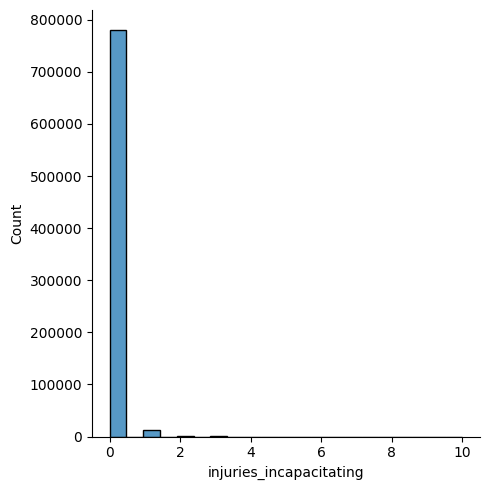

<Figure size 640x480 with 0 Axes>

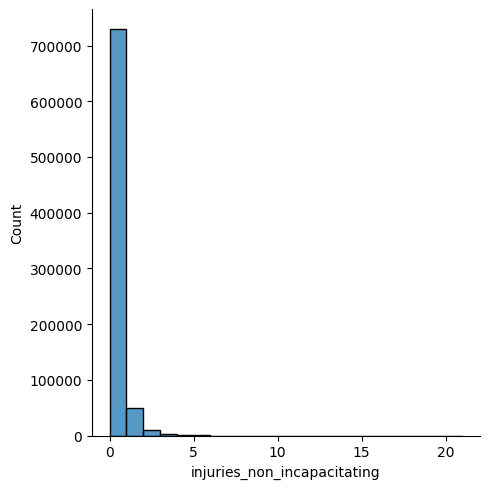

<Figure size 640x480 with 0 Axes>

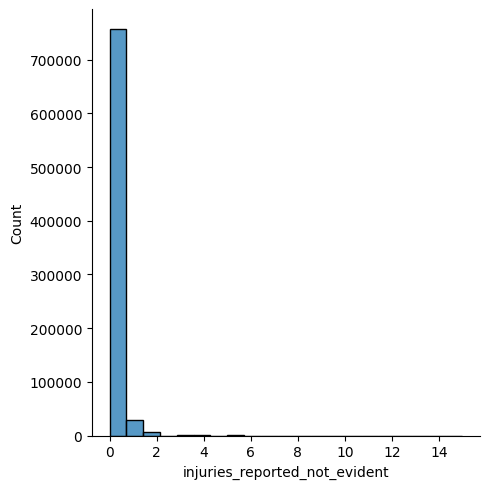

<Figure size 640x480 with 0 Axes>

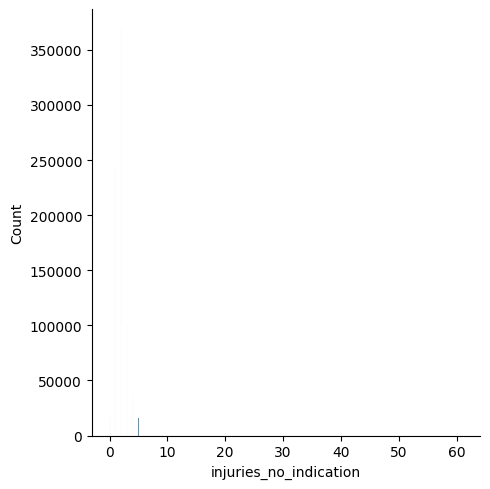

<Figure size 640x480 with 0 Axes>

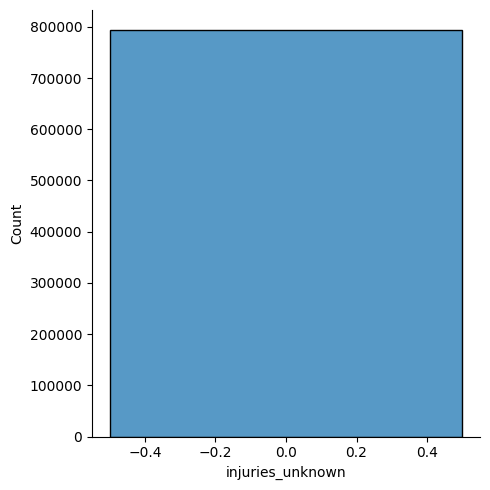

<Figure size 640x480 with 0 Axes>

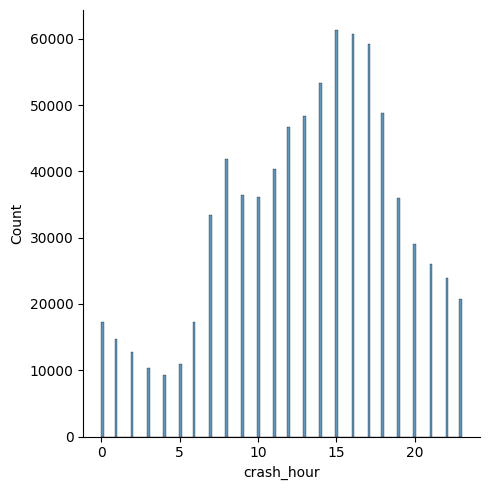

<Figure size 640x480 with 0 Axes>

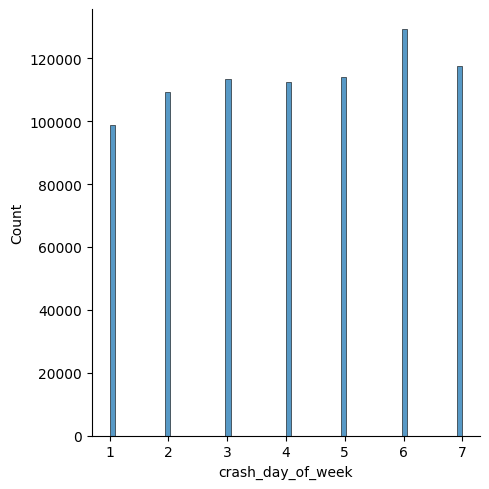

<Figure size 640x480 with 0 Axes>

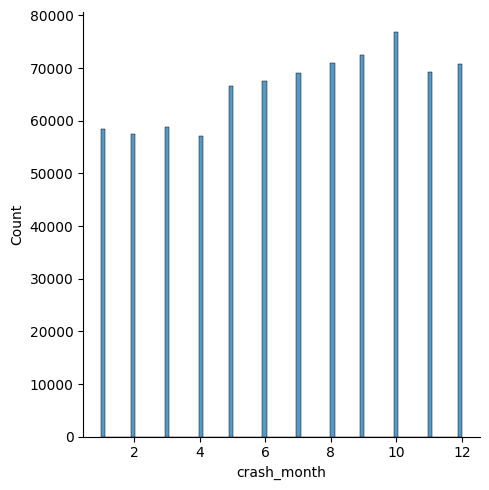

In [65]:
import matplotlib.pyplot as plt

# Generate a Q-Q plot
for i in crashes_df.columns:
    if(crashes_df[i].dtype=="object"):
        continue

    plt.figure()
    sns.distplot(crashes_df[i])
    plt.show()

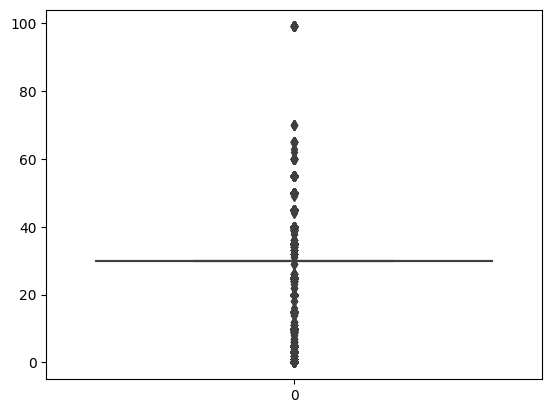

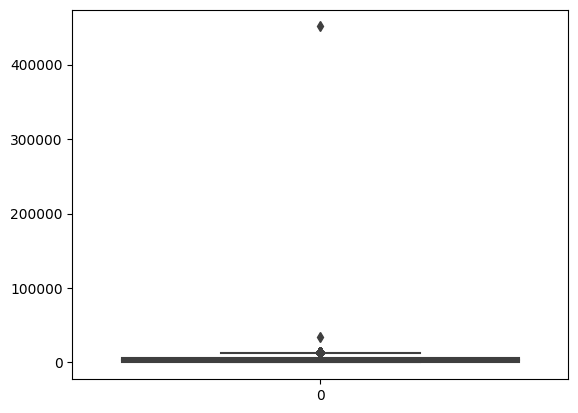

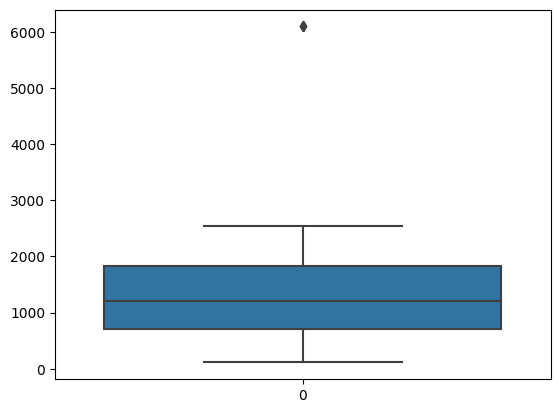

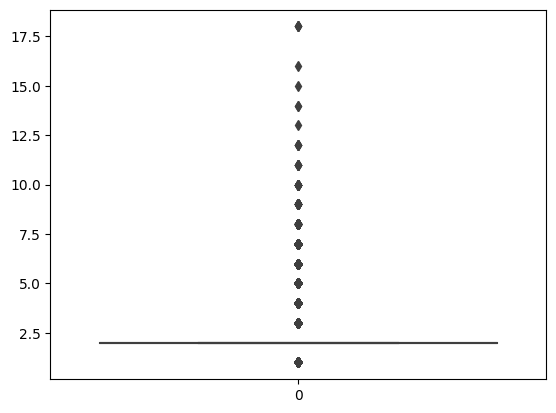

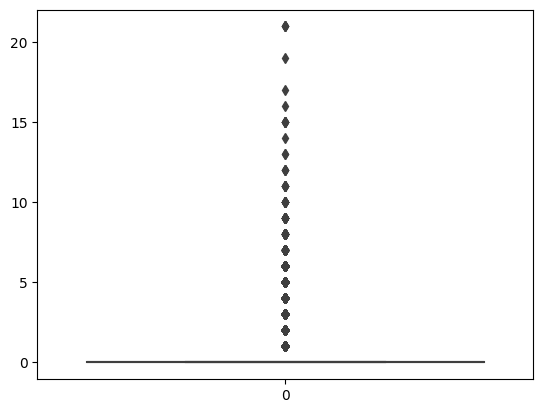

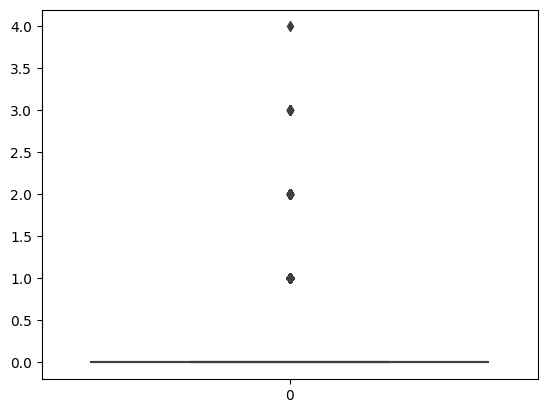

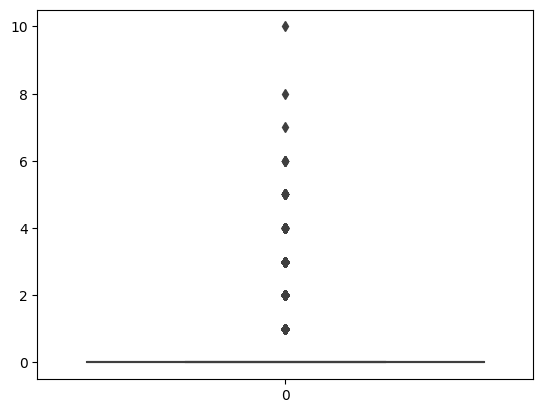

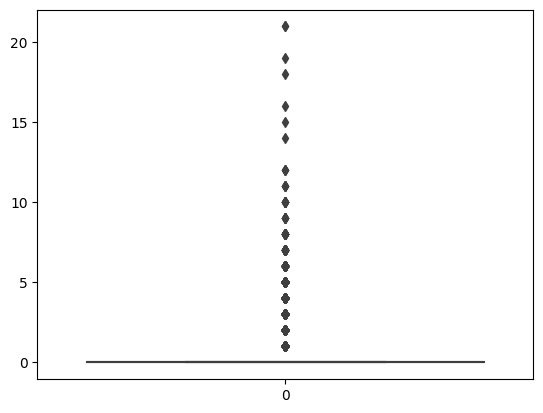

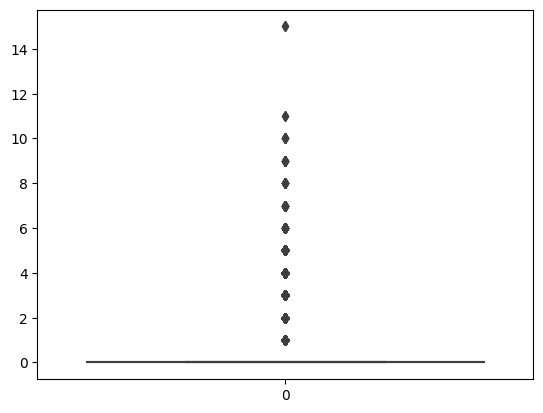

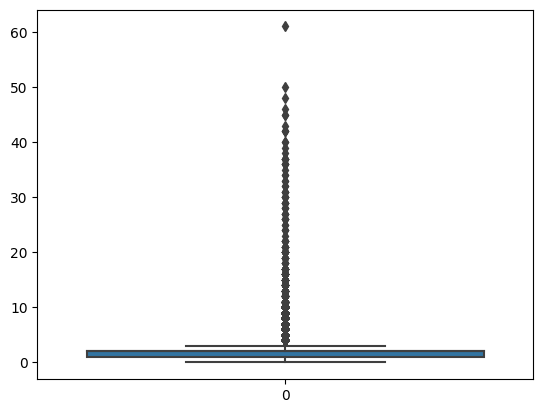

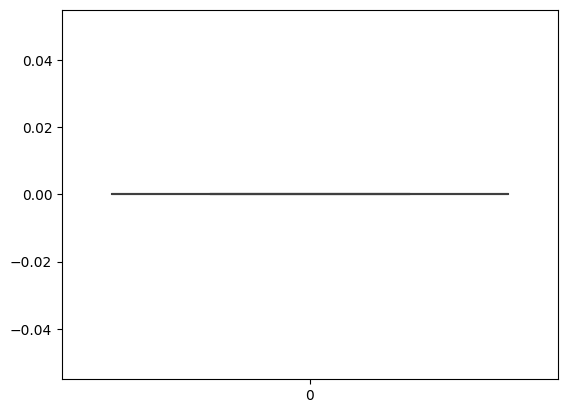

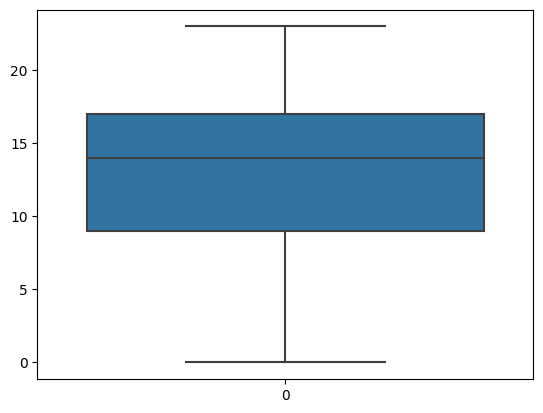

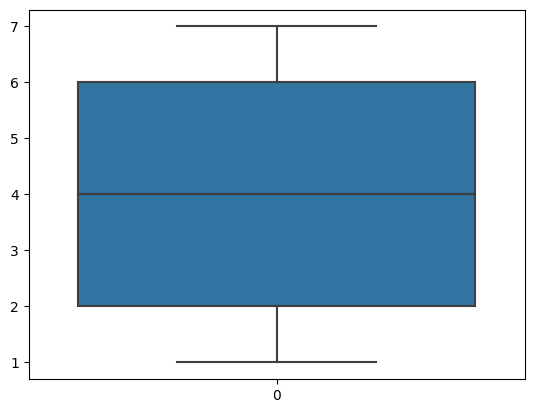

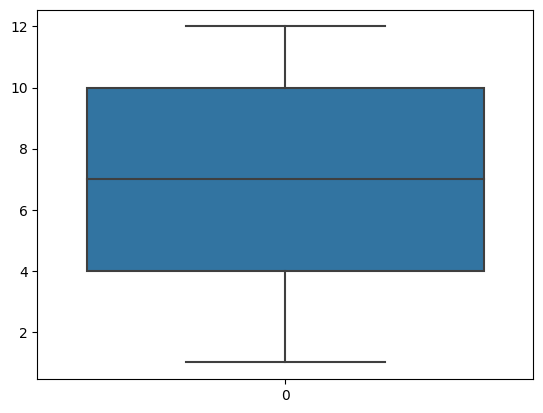

In [66]:
import matplotlib.pyplot as plt

# Generate a boxplot
for i in crashes_df.columns:
    if(crashes_df[i].dtype=="object"):
        continue

    plt.figure()
    sns.boxplot(crashes_df[i])
    plt.show()

In [69]:
threshold = 1.5

# Initialize an empty DataFrame to store data without outliers
data_no_outliers = pd.DataFrame()

# Iterate through each column (feature) in the dataset
for column in crashes_df.columns:
    if(crashes_df[column].dtype=="object" or crashes_df[column].dtype=="bool"):
        continue
    # Calculate Q1 and Q3 for the current column
    Q1 = crashes_df[column].quantile(0.25)
    Q3 = crashes_df[column].quantile(0.75)

    # Calculate IQR for the current column
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter rows that are not outliers for the current column
    filtered_data = crashes_df[(crashes_df[column] >= lower_bound) & (crashes_df[column] <= upper_bound)]

    # Append the filtered data to the result DataFrame
    data_no_outliers[column] = filtered_data[column]
    # data_no_outliers = pd.concat([data_no_outliers, filtered_data])

# Reset the index of the result DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers['posted_speed_limit']
print("maxi1:",max(data_no_outliers['posted_speed_limit']))
print("maxi2:",max(crashes_df['posted_speed_limit']))
# data_no_outliers now contains the dataset with outliers removed column-wise

maxi1: 30
maxi2: 99


<Figure size 640x480 with 0 Axes>

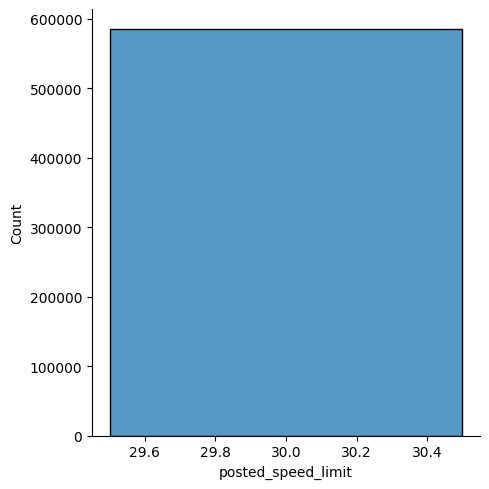

<Figure size 640x480 with 0 Axes>

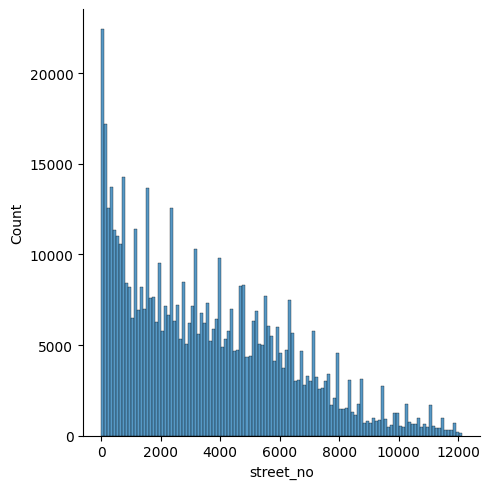

<Figure size 640x480 with 0 Axes>

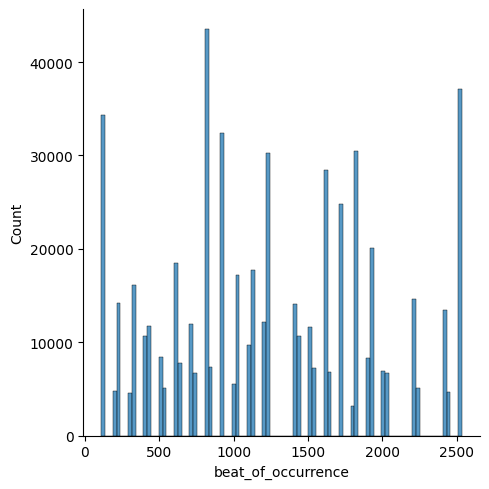

<Figure size 640x480 with 0 Axes>

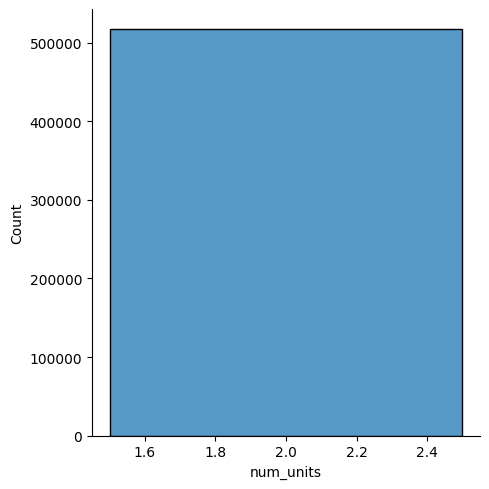

<Figure size 640x480 with 0 Axes>

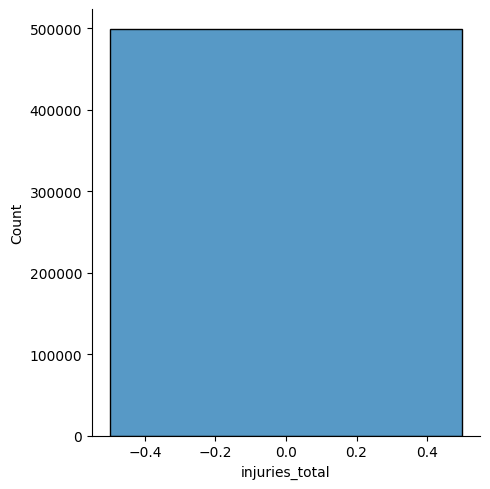

<Figure size 640x480 with 0 Axes>

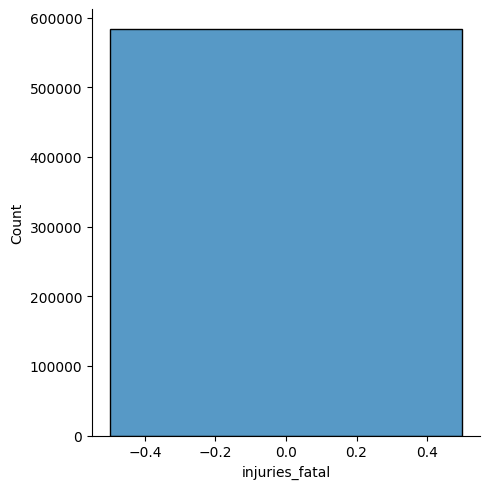

<Figure size 640x480 with 0 Axes>

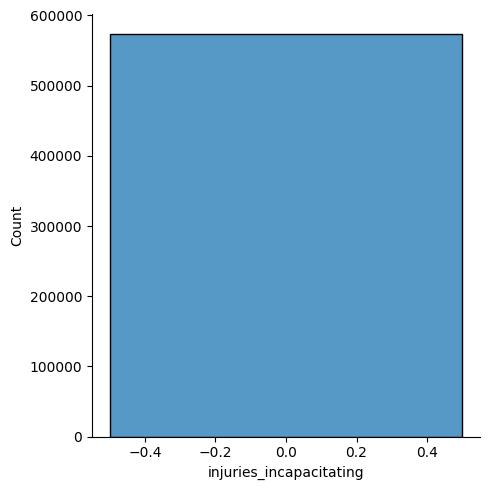

<Figure size 640x480 with 0 Axes>

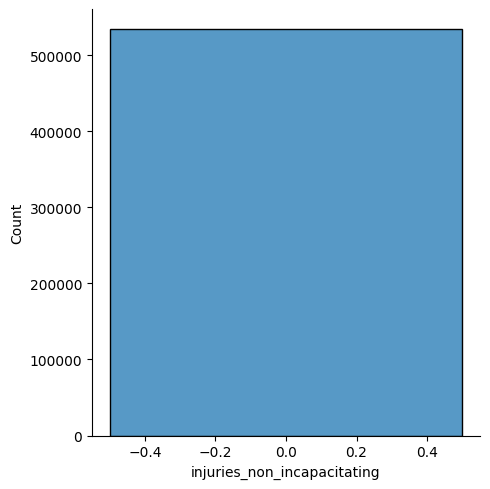

<Figure size 640x480 with 0 Axes>

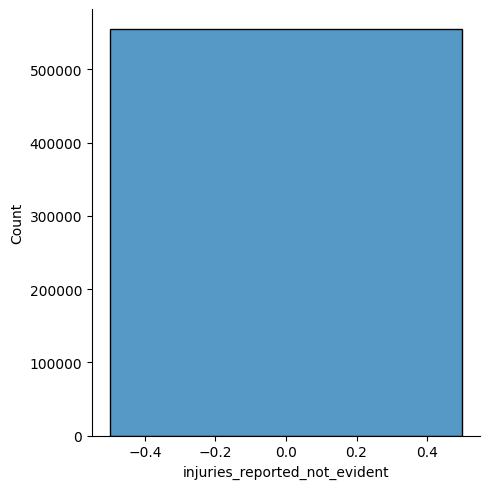

<Figure size 640x480 with 0 Axes>

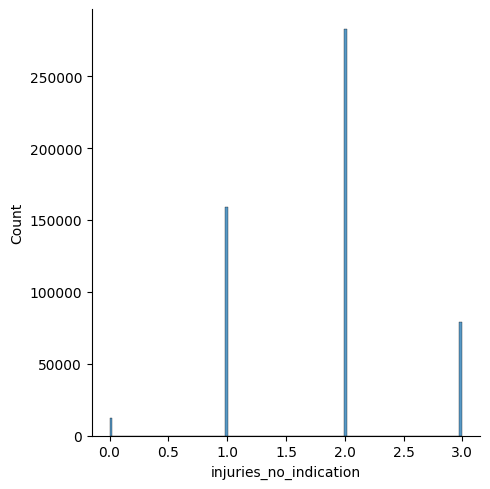

<Figure size 640x480 with 0 Axes>

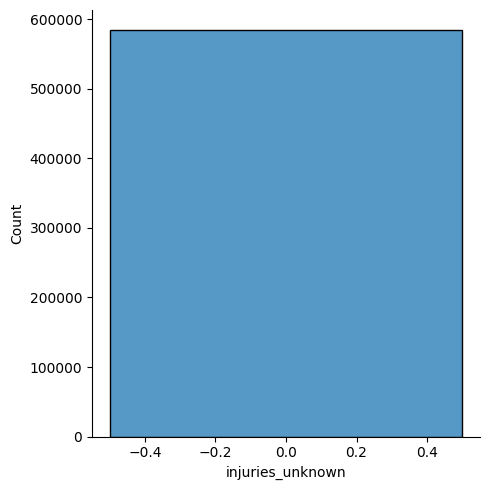

<Figure size 640x480 with 0 Axes>

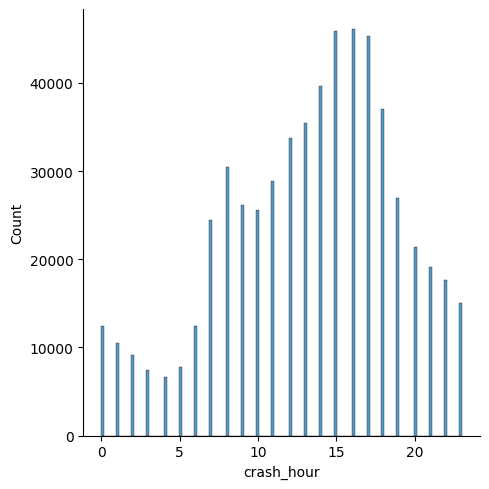

<Figure size 640x480 with 0 Axes>

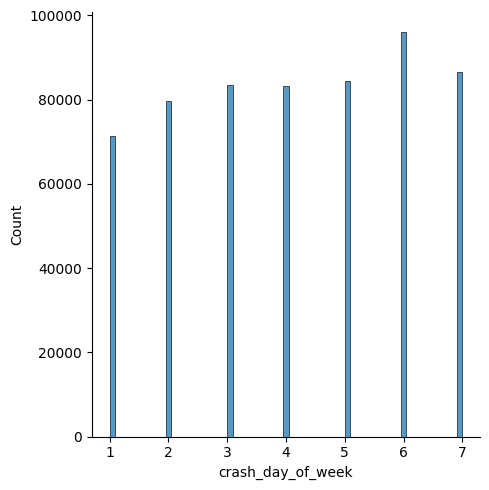

<Figure size 640x480 with 0 Axes>

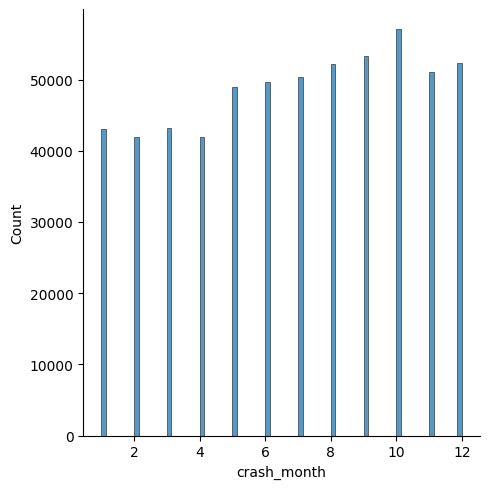

In [71]:
# Plot after removing outliers
import matplotlib.pyplot as plt

for i in data_no_outliers.columns:
    if(data_no_outliers[i].dtype=="object"):
        continue

    plt.figure()
    sns.displot(data_no_outliers[i])
    plt.show()

In [72]:
data_no_outliers

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month
0,30,5500.0,225.0,2.0,NaN,0.0,NaN,NaN,0.0,2.0,0.0,19,3,9
1,30,2101.0,1235.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7
2,30,10020.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8
3,30,2.0,1652.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,2,2
4,30,1732.0,1814.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584918,30,1110.0,1811.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,2,11
584919,30,9500.0,511.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,3,10
584920,30,44.0,512.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,7,11
584921,30,5115.0,813.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,18,2,11
